# Projeto Eletromag 21.2

## Ressonância magnética

- Andresa Bicudo
- Beatriz Cabral
- Vitor Bandeira

In [41]:
from math import *
from cmath import *
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

## Etapa 1:

1) Elaboração do diagrama do modelo eletrodinâmico do circuito WPT

2) Código do modelo numérico

3) Construção de gráficos de I e I2 em função da frequência

4) Construção de gráficos das potências e da eficiência em função da frequência

### 1) Elaboração do diagrama do modelo eletrodinâmico do circuito WPT: 

Essa atividade consiste em especificar, por meio de um circuito, o modelo eletrodinâmico WPT usando abordagem fasorial. 

Para isso, o modelo eletrodinâmico do transformador deve ser adaptado de modo a considerar o parâmetro
𝑘 e os capacitores 𝐶1 e 𝐶2, lembrando que 𝑪𝟏 deve estarsérie com a bobina primária, e 𝑪𝟐 em paralelo
com a secundária; no projeto, vamos considerar que as bobinas transmissora e receptora sejam iguais,
ou seja, 𝐿1 = 𝐿2. 

Do mesmo modo, os capacitores também devem ser iguais (𝐶1 = 𝐶2), de modo que a
frequência de ressonância dos conjuntos 𝐿𝐶 seja a mesma no primário e secundário. 

Pesquise sobre como calcular a frequência de ressonância de um conjunto 𝐿𝐶.

Referências:

- https://www.youtube.com/watch?v=OwI0FXA-NIY

w = 1/sqrt(w*C)

In [42]:
![Circuito](./img/circ.pdf)

/bin/sh: -c: line 0: syntax error near unexpected token `./img/circ.pdf'
/bin/sh: -c: line 0: `[Circuito](./img/circ.pdf)'


### 2) Código do modelo numérico: 

Essa atividade consiste em escrever um código em Python que simule o modelo esquematizado no item anterior.

O código deve usar como parâmetros os valores das indutâncias, capacitâncias e resistências das bobinas primária e secundária (neste momento, usem valores quaisquer, mas razoáveis do ponto de vista físico). 

Recomenda-se a utilização, como ponto de partida, do código em Python usado no laboratório 2. 

Documente seu código explicando cada etapa do cálculo. 

Para as simulações iniciais, adotem valores razoáveis para indutâncias, frequência, resistências e capacitâncias a serem utilizados.

In [43]:
# Resistência da carga a ser utilizada
RC = 10

# Resistências internas das bobinas
R1 = 1 # definir
R2 = R1

''' Parâmetros medidos '''
R1 = 103.9e-3
R2 = 88.21e-3

# Capacitâncias (dos capacitores que vão gerar o efeito de ressonância)
# C1 = 4.7e-6 # definir
# C2 = C1
C1 = 4.7e-6
C2 = C1

# Indutâncias (dos indutores que fazem parte da bobina)
# L1 = 100e-6 # definir
# L2 = L1

''' Parâmetros medidos '''
L1 = 104.1e-6
L2 = 102.8e-6

# Indutância mútua
M = sqrt(L1*L2)

print(f"A capacitância no primário C1 é de {C1} F (e está em série)")
print(f"A capacitância no secundário C2 é de {C2} F (e está em paralelo)\n")

print(f"A indutância no primário L1 é de {L1} H (e está em série)")
print(f"A indutância no secundário L2 é de {L2} H (e está em paralelo)")

A capacitância no primário C1 é de 4.7e-06 F (e está em série)
A capacitância no secundário C2 é de 4.7e-06 F (e está em paralelo)

A indutância no primário L1 é de 0.0001041 H (e está em série)
A indutância no secundário L2 é de 0.0001028 H (e está em paralelo)


In [44]:
Uf = 1 # definir
k = 0.7 # chutar um valor - 0 a 1
M = k*sqrt(L1*L2)

# a freq de ressonância em LC tem de que ser igual nos dois conjuntos
w = sqrt(1/(L1*C1))
w_lc1 = w
w_lc2 = w # são iguais porque os p
# parâmetros do primário e secundário são iguais


# Reatâncias capacitivas
XC1 = 1/(1j*w*C1)
XC2 = XC1

# Reatâncias indutivas
XL1 = 1j*w*L1
XL2 = XL1

# Reatância indutiva (da mútua)
XM = 1j*w*M

print(f"A reatância capacitiva no primário XC1 é de {XC1}")
print(f"A reatância capacitiva no secundário XC2 é de {XC2}\n")

print(f"A reatância indutiva no primário XL1 é de {XL1}")
print(f"A reatância indutiva no secundário XL2 é de {XL2}")
print(f"Freq de ressonancia: {w_lc1/(2*pi)}")

A reatância capacitiva no primário XC1 é de -4.706265628947517j
A reatância capacitiva no secundário XC2 é de -4.706265628947517j

A reatância indutiva no primário XL1 é de 4.706265628947516j
A reatância indutiva no secundário XL2 é de 4.706265628947516j
Freq de ressonancia: (7195.249167631941+0j)


In [45]:
# adaptando para receber outros fatores
def CalcularTransformadorNovo2(Uf, RC, freq, k):
    '''
    Os parâmetros L1, L2, C1, C2 são variáveis globais
    Considerando que L1 = L2 e C1 = C2
    '''

    # para variar a frequência
    w = 2*pi*freq
    M = k*sqrt(L1*L2)

    # Reatâncias capacitivas
    XC1 = 1/(1j*w*C1)
    XC2 = XC1

    # Reatâncias indutivas
    XL1 = 1j*w*L1
    XL2 = XL1

    # Reatância indutiva (da mútua)
    XM = 1j*w*M

    # calculando a reatância equivalente do primário (tudo em série)
    X1 = R1+XL1+XC1

    # calculando a reatância equivalente do paralelo
    # entre RC e o capacitor 2
    XRC = (RC*XC2)/(RC+XC2)

    # somando isso à reatância indutiva e R2 (que representam a bobina)
    # e que estão em série com o resto
    X2 = XL2+R2+XRC

    # criando a matriz da impedância
    # (que envolve os fatores que multiplicam as correntes I1 e I2)
    Z=np.array([[X1, -XM],[-XM, X2]])

    # criando a matriz das tensões
    V=np.array([Uf,0])

    # calculando a multiplicação das duas matrizes anteriores, 
    # que resultam nas correntes que queremos encontrar
    i=np.dot(np.linalg.inv(Z),V)

    return i[0], i[1]

# Calculando as correntes através das matrizes
# I1, I2 = CalcularTransformadorNovo2(Uf, RC, freq, k)
# print(f"A corrente no primário I1 é de:\n{I1}")
# print(f"A corrente no secundário I2 é de:\n{I2}")

### 3) Construção de gráficos de I1 e I2 em função da frequência: 

Essa atividade consiste em fazer um gráfico dos módulos das correntes I1 e I2 em função 
da frequência da fonte, para um 𝑘 (coeficiente de acoplamento) qualquer inicialmente fixo.

A frequência para a qual as correntes são máximas é coincidente com a frequência de ressonância 
que vocês obtiveram na atividade 1? 

O que acontece com os gráficos dos módulos das correntes 
quando se altera o 𝑘 do circuito? 

Documente os resultados que obtiveram, pensando em gráficos 
adicionais que possam esclarecer o funcionamento do circuito.

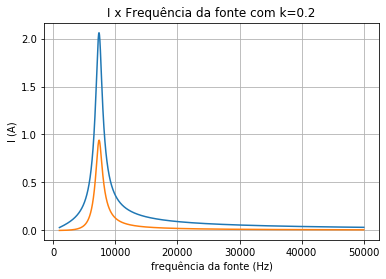

In [46]:
# V2 - precisa adaptar porque agora tem o paralelo
# 200 k Hz
lista_freq = np.linspace(1e3, 50e3, 10000)
lista_i1 = []
lista_i2 = []

'''
Quanto menor o k, menor a transmissão da 
frequência para o secundário

(confirmar)
'''

for f in lista_freq:
    i1, i2 = CalcularTransformadorNovo2(Uf, RC, f, 0.2)
    lista_i1.append(abs(i1))
    lista_i2.append(abs(i2))

# k fixo inicialmente
plt.plot(lista_freq,lista_i1)
plt.title("I x Frequência da fonte com k=0.2")
plt.ylabel("I (A)")
plt.xlabel("frequência da fonte (Hz)")
#plt.legend([lista_i1, lista_i2], ['I1', 'I2'])
plt.grid(True)

plt.plot(lista_freq, lista_i2)
plt.show()

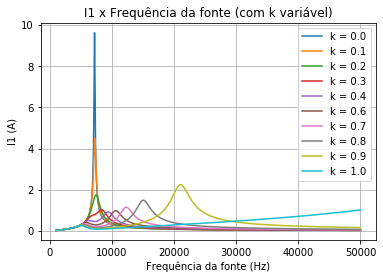

In [47]:
'''
Criando uma lista para as legendas do gráfico
'''
lista_k = np.linspace(0, 1, 10)
lista_legendas = []
for k in lista_k:
    legenda = str("k = {:.1f}".format(k))
    lista_legendas.append(legenda)

'''
For interno -  cria a lista de correntes
For externo - varia o k para criar essa lista toda as vezes que o k muda
plota no for externo
'''

for k_novo in lista_k:
    lista_i1k = []
    # lista_i2k = []
    for f in lista_freq:
        i1, i2 = CalcularTransformadorNovo2(Uf, RC, f, k_novo)
        lista_i1k.append(abs(i1))
        # lista_i2k.append(abs(i2))

    # plot1 = plt.figure(1)
    plt.plot(lista_freq, lista_i1k)
    # plot2 = plt.figure(2)
    # plt.plot(lista_freq, lista_i2k)

plot1 = plt.figure(1)
plt.title("I1 x Frequência da fonte (com k variável)")
plt.ylabel("I1 (A)")
plt.xlabel("Frequência da fonte (Hz)")
plt.legend(lista_legendas)
plt.grid(True)

# plot2 = plt.figure(2)
# plt.title("I2 x Frequência da fonte (com k variável)")
# plt.ylabel("I2 (A)")
# plt.xlabel("Frequência da fonte (Hz)")
# plt.legend(lista_legendas)
# plt.grid(True)

plt.show()

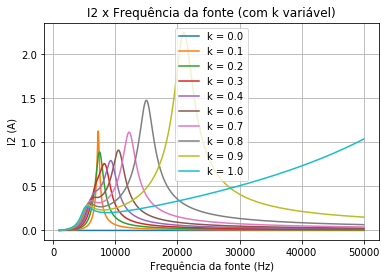

In [48]:
for k_novo in lista_k:
    lista_i2k = []
    for f in lista_freq:
        i1, i2 = CalcularTransformadorNovo2(Uf, RC, f, k_novo)
        lista_i2k.append(abs(i2))

    plt.plot(lista_freq, lista_i2k)

plt.title("I2 x Frequência da fonte (com k variável)")
plt.ylabel("I2 (A)")
plt.xlabel("Frequência da fonte (Hz)")
plt.legend(lista_legendas)
plt.grid(True)
plt.show()

### 4) Construção de gráficos das potências e da eficiência em função da frequência:
Por fim, a última atividade da Etapa 1 consiste em construir gráficos das potências reais de entrada e de saída em função da frequência.

Além desses gráficos, vocês construirão um terceiro gráfico que relacionará a eficiência (ou o ganho de potência) do seu sistema com frequência da fonte. Documente os resultados que obtiveram, pensando em gráficos adicionais que possam esclarecer o funcionamento do circuito.

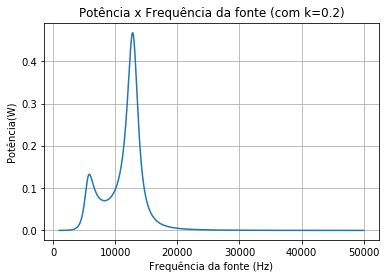

In [49]:
def CalcularImpedanciaAntena(f, L, C, R, RC):
    w = 2*pi*f
    Z = R+1j*w*L+(((1/(1j*w*C))*RC)/((1/(1j*w*C))+RC))
    return Z

def Calcula_Potencia(V, i):
    return V/sqrt(2)*i.conjugate()/sqrt(2)

def calcula_eficiencia(S1,S2):
    return S2.real/S1.real

lista_iRC = []
lista_eficiencia = []
lista_potencia_carga = []

for f in lista_freq:
    i1, i2 = CalcularTransformadorNovo2(Uf, RC, f, 0.7)
    w = 2*pi*f
    P_f = (Calcula_Potencia(Uf, i1))
    Z_eq_carga = ((1/(1j*w*C1))*RC)/((1/(1j*w*C1))+RC)
    V_carga = i2*Z_eq_carga
    I_RC = V_carga/RC
    P_c = (Calcula_Potencia(V_carga, I_RC))
    lista_potencia_carga.append(P_c)
    lista_eficiencia.append(calcula_eficiencia(P_f, P_c))
    #lista_iRC.append(abs(I_RC))

plt.plot(lista_freq,lista_potencia_carga)
plt.title("Potência x Frequência da fonte (com k=0.2)")
plt.ylabel("Potência(W)")
plt.xlabel("Frequência da fonte (Hz)")
plt.grid(True)
plt.show()

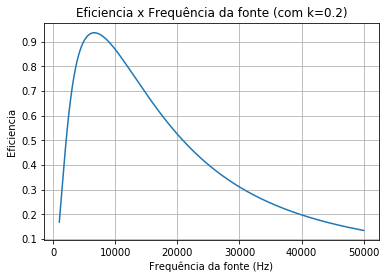

In [50]:
plt.plot(lista_freq,lista_eficiencia)
plt.title("Eficiencia x Frequência da fonte (com k=0.2)")
plt.ylabel("Eficiencia")
plt.xlabel("Frequência da fonte (Hz)")
plt.grid(True)
plt.show()

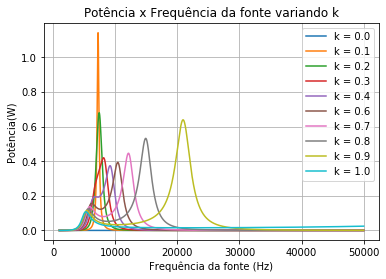

In [51]:
'''
Mesmo com o k sendo menor, 
consegue transmitir a maior potência
'''

# variando o k também
for k_novo in lista_k:
    lista_potencia_carga = []
    for f in lista_freq:
        i1, i2 = CalcularTransformadorNovo2(Uf, RC, f, k_novo)
        w = 2*pi*f
        P_f = (Calcula_Potencia(Uf, i1))
        Z_eq_carga = (((1/(1j*w*C1))*RC)/((1/(1j*w*C1))+RC))
        V_carga = i2*Z_eq_carga
        I_RC = V_carga/RC
        P_c = (Calcula_Potencia(V_carga, I_RC)).real
        lista_potencia_carga.append(P_c)

    plt.plot(lista_freq,lista_potencia_carga)

plt.title("Potência x Frequência da fonte variando k")
plt.ylabel("Potência(W)")
plt.xlabel("Frequência da fonte (Hz)")
plt.legend(lista_legendas)
plt.grid(True)
plt.show()

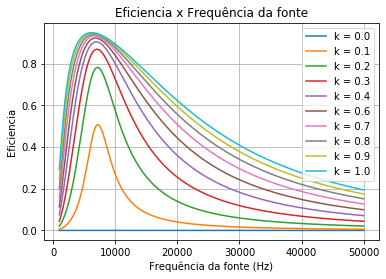

In [52]:
# variando o k também

'''
O maior k é a maior eficiência
(coerente)
'''

for k_novo in lista_k:
    lista_eficiencia = []
    for f in lista_freq:
        i1, i2 = CalcularTransformadorNovo2(Uf, RC, f, k_novo)
        w = 2*pi*f
        P_f = (Calcula_Potencia(Uf, i1))
        Z_eq_carga = (((1/(1j*w*C1))*RC)/((1/(1j*w*C1))+RC))
        V_carga = i2*Z_eq_carga
        I_RC = V_carga/RC
        P_c = (Calcula_Potencia(V_carga, I_RC)).real
        lista_eficiencia.append(calcula_eficiencia(P_f, P_c))

    plt.plot(lista_freq,lista_eficiencia)

plt.title("Eficiencia x Frequência da fonte")
plt.ylabel("Eficiencia")
plt.xlabel("Frequência da fonte (Hz)")
plt.legend(lista_legendas)
plt.grid(True)
plt.show()

## Etapa 2 – Presencial - Atividades

1) Montagem do circuito de alimentação do primário

2) Projeto das bobinas de transmissão e recepção

3) Montagem das bobinas primária e secundária

4) Atualização da simulação da Etapa 1

5) Montagem do circuito WPT e medição das distâncias e potências transmitidas

6) Preparação da apresentação do projeto, a ser realizada no dia 29/11

```py
Quanto maior o raio da bobina, maior é o k*
Fio encapado 6mm (de chuveiro) - ideal
Porque fio fino é ruim (muita resistência)

Software que calcula a indutância

Quanto menor a frequência, menos o R1 e R2 aumentam

Uma frequência muito alta vai aumentar o R1 e R2

Uma bobina maior reflete uma frequência menor - qto maior a indutância menor a frequência
```

In [53]:
# Calcular potencia

### 1) Montagem do circuito de alimentação do primário: 

Pelo fato de o gerador de sinais não ter potência suficiente para alimentar a bobina primária do WPT, vamos precisar trabalhar com um circuito denominado “meia ponte” (ou half bridge), capaz de isolar a excitação na frequência de ressonância (circuito de controle), proveniente do gerador de sinais, da alimentação da bobina primária (circuito de potência). 

Observe o circuito que vamos montar na figura a seguir. 

Na entrada do circuito (pino 2 do IR2302) conectaremos o gerador de sinais ou o Arduíno, que deve fornecer um sinal de onda quadrada na frequência de ressonância (entre 0 𝑉 e 𝑉𝑐𝑐). 

O circuito integrado IR2302 controla o acionamento das chaves eletrônicas (MOSFETs), acionando-as alternadamente nos semiciclos nulo e positivo do sinal quadrado. Na montagem do circuito, é fundamental verificar o sinal de onda quadrada nos pontos de entrada e saída com o auxílio de um osciloscópio (esse sinal deve ir de 0 𝑉 a 𝑉𝑐𝑐, sendo
𝑉𝑐𝑐 máximo igual a 5 𝑉). Perguntem aos professores e aos técnicos do LFI sobre o funcionamento desse circuito, não deixando de fazer anotações sobre ele, principalmente compreendo por que não é possível conectar o Arduíno ou o gerador de sinais diretamente à bobina primária.

IMPORTANTE: todos os componentes para a montagem desse circuito encontram-se no LFI.

In [54]:
'''
incluir imagem
'''

'\nincluir imagem\n'

### 2) Projeto das bobinas de transmissão e recepção: 
Seu grupo deve projetar as bobinas que serão
utilizadas no circuito. Vocês devem decidir qual o formato, raio/largura, largura do fio e número de
voltas para certa indutância pretendida, além de definirem a frequência em que pretendem transmitir
energia pelo ar (devido aos limites do circuito meia ponte, vamos limitar a frequência a um máximo
de 50𝑘𝐻𝑧). Há inúmeros sites/artigos que fornecem equações ou permitem o cálculo aproximado da
indutância de uma bobina com formato específico e com núcleo de ar. Os professores e os técnicos
podem ajudar a escolher sites confiáveis ou equações já testadas em laboratório.
Definidas a indutância e a frequência de operação, é possível calcular a capacitância dos capacitores
𝐶1 e 𝐶2 de modo a que o sistema trabalhe na frequência de ressonância pretendida.

In [55]:
'''
Circuito e bobinas montadas
incluir imagem
'''

'\nCircuito e bobinas montadas\nincluir imagem\n'

### 3) Montagem das bobinas primária e secundária: 

Após estimar os valores de indutância usando equações e/ou softwares, assim como os valores de frequência e dos capacitores, vocês devem construir as bobinas e medir suas indutâncias e resistências usando o medidor LCR de alta precisão que temos no laboratório (certifiquem-se que estão medindo as indutâncias e as resistências das bobinas na
frequência de operação do circuito de vocês). 

Será necessário adaptar o projeto aos componentes
existentes, o que os pode levar a refazer/ajustar as bobinas. Quando maior a frequência, maiores os
valores das resistências 𝑅1 e 𝑅2 das bobinas devido ao “efeito pelicular” (ou skin effect). 

Pesquisem sobre esse efeito.

In [56]:
Ls1 = 104.1e-6
R1 = 103.9e-3

Ls2 = 102.8e-6
R2 = 88.21e-3

### 4) Atualização da simulação da Etapa 1: 

Como agora vocês têm os parâmetros medidos das bobinas e
capacitores, devem atualizar os parâmetros do modelo construído na Etapa 1. 

Como estamos trabalhando com uma tensão quadrada na entrada da bobina primária, precisamos fazer uma pequena
alteração na amplitude da função senoidal usada na simulação. 

Para isso, utilize a expressão:

𝑽𝟏(𝒕) = 𝟐𝝅𝑽𝒑 𝒄𝒐𝒔(𝝎𝒕)

Nessa expressão, 𝑉𝑝 é a amplitude da onda quadrada (alimentação dos MOSFETs). 

Os professores ficarão felizes em explicar por que isso é necessário.

In [57]:
C1 = 4.7e-6
C2 = C1

### 5) Montagem do circuito WPT e medição das distâncias e potências transmitidas: 

Nessa atividade, vocês conectarão as bobinas ao circuito e iniciarão o experimento, filmando as situações experimentadas para edição final de um vídeo demonstração. Comparem a medição da tensão 𝑉2( ) àquela simulada pelo modelo. 

Percebam que é possível ajustar o coeficiente de acoplamento de tal modo a calibrar o modelo frente às medições. 

É possível construir um circuito retificador simples, com quatro diodos e um capacitor eletrolítico, a ser conectado à saída do circuito secundário - tensão 𝑉2( ) -, de modo que
uma carga DC possa ser conectada ao receptor WPT.

In [58]:
'''
Incluir vídeo
Max: 5.4 V
Pc-Pc: 11.1 V
'''

'\nIncluir vídeo\nMax: 5.4 V\nPc-Pc: 11.1 V\n'

### 6) Preparação da apresentação do projeto, a ser realizada no dia 29/11: 

Em 5 ou 6 slides, vocês devem explicar o circuito, o processo de construção das bobinas, as medições e validações realizadas. 

É muito
importante que elaborem uma tabela com as medições das potências transmitidas e a que distâncias
ocorreram as transmissões. Observem a tabela a seguir para orientação, a qual deve ser preenchida
com um mínimo de 5 medições.

In [59]:
''
# Link dos slides
'''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-59-24cf89855d78>, line 3)

### RASCUNHO

In [ ]:
# RASCUNHO
def CalcularTransformador(Uf, RC):
    Z=np.array([[R1+XL1, -XM],[-XM, XL2+R2+RC]])
    V=np.array([Uf,0])
    i=np.dot(np.linalg.inv(Z),V)
    return i[0], i[1]

# Reatância total do circuito primário
X1 = XL1 + XC1 + R1 # série

# Reatância total do circuito secundário
X2 = XL2 + R2 + (XC2+R2)/(XC2*R2) # paralelo

print(f"A reatância total no primário X1 é de {X1}")
print(f"A reatância total no secundário X2 é de {X2}\n")

'''
As mudanças necessárias na matriz do cálculo das correntes do transformador são
incluir os capacitores (em série no primário e em paralelo no secundário)

No primário, somamos a reatância capacitiva aos outros valores de 
'''

def CalcularTransformadorNovo(Uf, RC, freq):
    
    # calculando a reatância equivalente do primário (tudo em série)
    X1 = R1+XL1+XC1

    # calculando a reatância equivalente do paralelo
    # entre RC e o capacitor 2
    XRC = (RC*XC2)/(RC+XC2)

    # somando isso à reatância indutiva e R2 (que representam a bobina)
    # e que estão em série com o resto
    X2 = XL2+R2+XRC

    # criando a matriz da impedância
    # (que envolve os fatores que multiplicam as correntes I1 e I2)
    Z=np.array([[X1, -XM],[-XM, X2]])

    # criando a matriz das tensões
    V=np.array([Uf,0])

    # calculando a multiplicação das duas matrizes anteriores, 
    # que resultam nas correntes que queremos encontrar
    i=np.dot(np.linalg.inv(Z),V)

    return i[0], i[1]

# Calculando as correntes através das matrizes
# I1, I2 = CalcularTransformadorNovo(Uf, RC)
# print(f"A corrente no primário I1 é de:\n{I1}")
# print(f"A corrente no secundário I2 é de:\n{I2}")

In [ ]:
def CalcularImpedanciaAntena(f, L, C, R, RC):
    w = 2*pi*f
    Z = R+1j*w*L+(((1/(1j*w*C))*RC)/((1/(1j*w*C))+RC))
    return Z

Z = []
for i in range(len(lista_freq)):
    Z.append(CalcularImpedanciaAntena(lista_freq[i], L1, C1, R1, RC)) 

plt.plot(lista_freq, Z)
# plt.ylim([-100,100])
# plt.xlim([6e6, 10e6])
plt.title("Impedância complexa em função da frequência")
plt.xlabel("Frequências [Hz]")
plt.ylabel("Impedância Imaginária")
plt.grid()
plt.show()